In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import style

from wordcloud import WordCloud, STOPWORDS
from collections import Counter

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

import warnings 
warnings.filterwarnings('ignore')




ETL

In [ ]:
df_EmisionesCO2= pd.read_csv("Carbon_(CO2)_Emissions_by_Country.csv")
df_EmisionesCO2 = df_EmisionesCO2.sort_values(by='Date') 
df_EmisionesCO2.head()

,Country,Region,Date,Kilotons of Co2,Metric Tons Per Capita
449,Barbados,Americas,01-01-1990,980.0,3.79
149,Angola,Africa,01-01-1990,6560.0,0.55
2697,Lao PDR,Asia,01-01-1990,510.0,0.12
3680,Nigeria,Africa,01-01-1990,72770.0,0.76
3681,North Korea,Asia,01-01-1990,123330.0,5.93


In [88]:
df_EmisionesCO2

,Country,Region,Date,Kilotons of Co2,Metric Tons Per Capita
449,Barbados,Americas,01-01-1990,980.0,3.79
149,Angola,Africa,01-01-1990,6560.0,0.55
2697,Lao PDR,Asia,01-01-1990,510.0,0.12
3680,Nigeria,Africa,01-01-1990,72770.0,0.76
3681,North Korea,Asia,01-01-1990,123330.0,5.93
...,...,...,...,...,...
2717,Latvia,Europe,01-01-2019,7570.0,3.96
1680,Fiji,Oceania,01-01-2019,1630.0,1.77
390,Bangladesh,Asia,01-01-2019,90740.0,0.55
2548,Kenya,Africa,01-01-2019,22280.0,0.44


In [89]:
print(df_EmisionesCO2['Date'].iloc[1:4])

149     01-01-1990
2697    01-01-1990
3680    01-01-1990
Name: Date, dtype: object


In [ ]:
df_EmisionesCO2.tail()

,Country,Region,Date,Kilotons of Co2,Metric Tons Per Capita
2717,Latvia,Europe,01-01-2019,7570.0,3.96
1680,Fiji,Oceania,01-01-2019,1630.0,1.77
390,Bangladesh,Asia,01-01-2019,90740.0,0.55
2548,Kenya,Africa,01-01-2019,22280.0,0.44
3323,Montenegro,Europe,01-01-2019,2600.0,4.18


In [ ]:
df_EmisionesCO2.sample(n=5)

,Country,Region,Date,Kilotons of Co2,Metric Tons Per Capita
5206,Turkey,Asia,01-01-2010,297109.99,4.06
2808,Liberia,Africa,01-01-1997,450.00,0.19
4160,Russia,Europe,01-01-1991,2136440.00,14.40
2369,Israel,Asia,01-01-2010,70520.00,9.25
798,Burkina Faso,Africa,01-01-2002,960.00,0.08


In [92]:
df_EmisionesCO2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5677 entries, 449 to 3323
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 5677 non-null   object 
 1   Region                  5677 non-null   object 
 2   Date                    5677 non-null   object 
 3   Kilotons of Co2         5677 non-null   float64
 4   Metric Tons Per Capita  5677 non-null   float64
dtypes: float64(2), object(3)
memory usage: 266.1+ KB


In [ ]:
df_EmisionesCO2.columns = df_EmisionesCO2.columns.str.strip()

In [ ]:
df_EmisionesCO2.columns.to_list()

['Country', 'Region', 'Date', 'Kilotons of Co2', 'Metric Tons Per Capita']

In [103]:
print(f"Valores faltantes:\n{df_EmisionesCO2.isnull().sum()}")
print(f"lineas completamente duplicadas: {df_EmisionesCO2.duplicated().sum()}")
df_EmisionesCO2 = df_EmisionesCO2.drop_duplicates()


Valores faltantes:
Country                   0
Region                    0
Date                      0
Kilotons of Co2           0
Metric Tons Per Capita    0
dtype: int64
lineas completamente duplicadas: 0


       Kilotons of Co2  Metric Tons Per Capita
count     5.677000e+03             5677.000000
mean      1.412292e+05                4.325505
std       6.491258e+05                5.503834
min       0.000000e+00                0.000000
25%       1.380000e+03                0.570000
50%       9.170000e+03                2.360000
75%       5.848000e+04                6.340000
max       1.070722e+07               47.650000


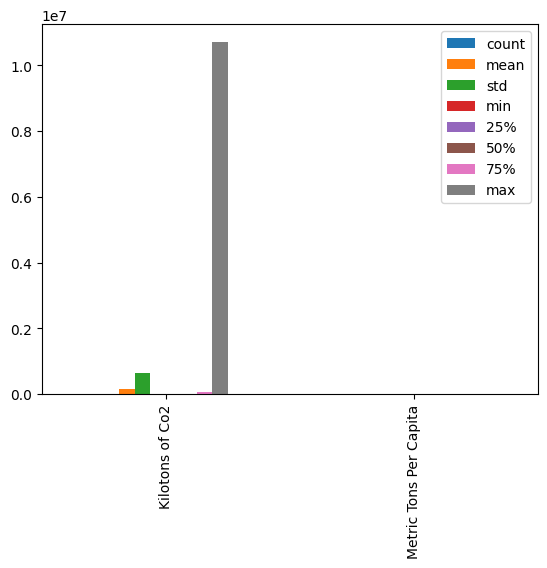

In [ ]:
df_EmisionesCO2.describe().T.plot(kind='bar')
print(df_EmisionesCO2.describe())

EDA

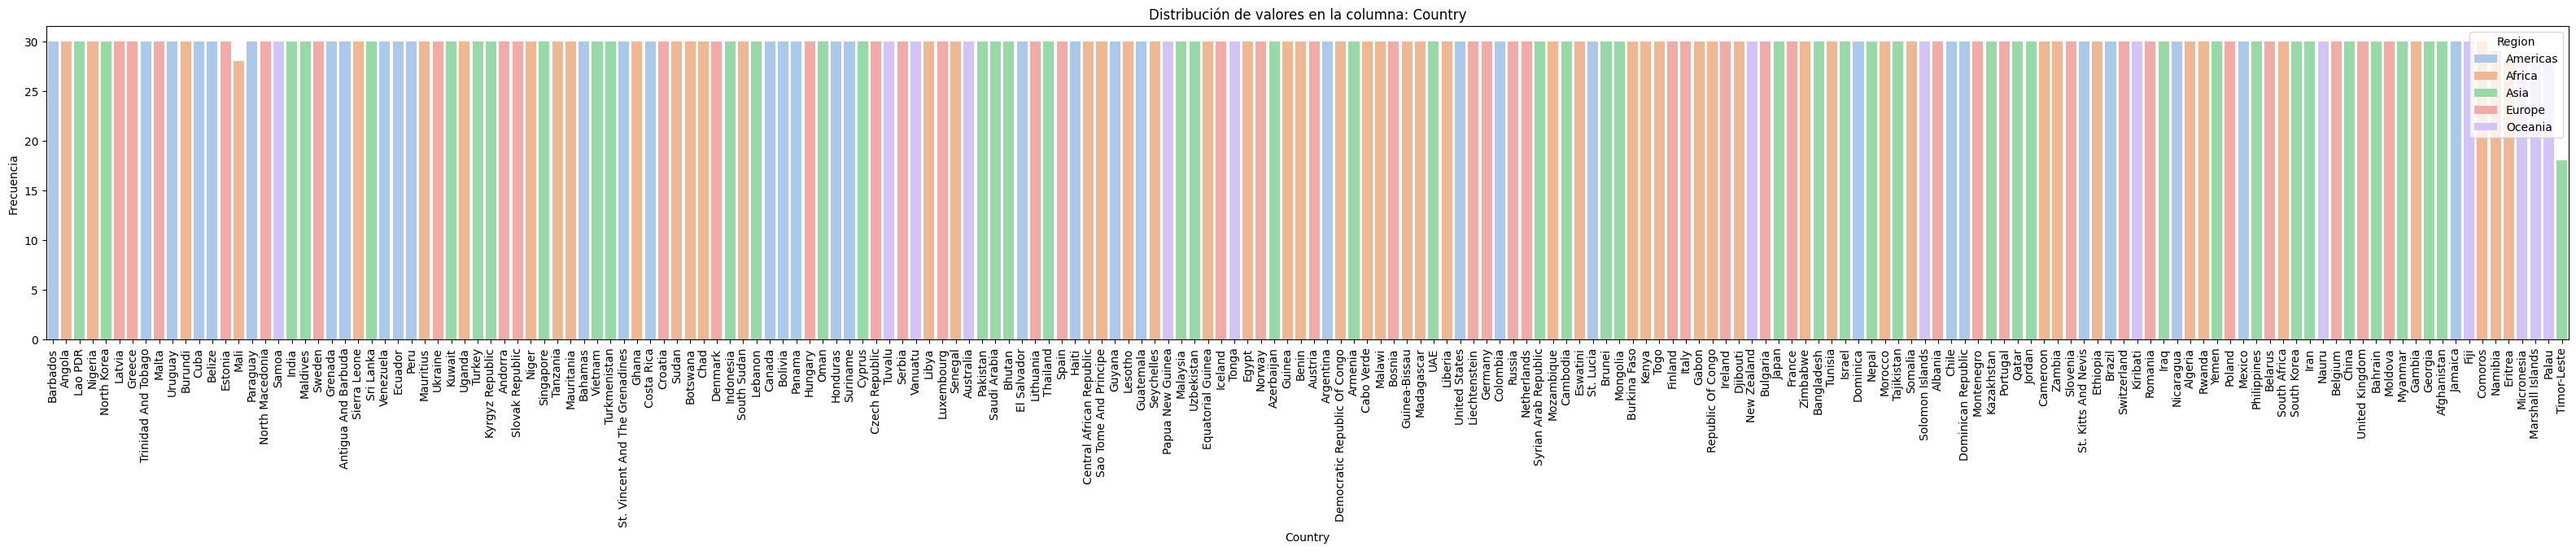

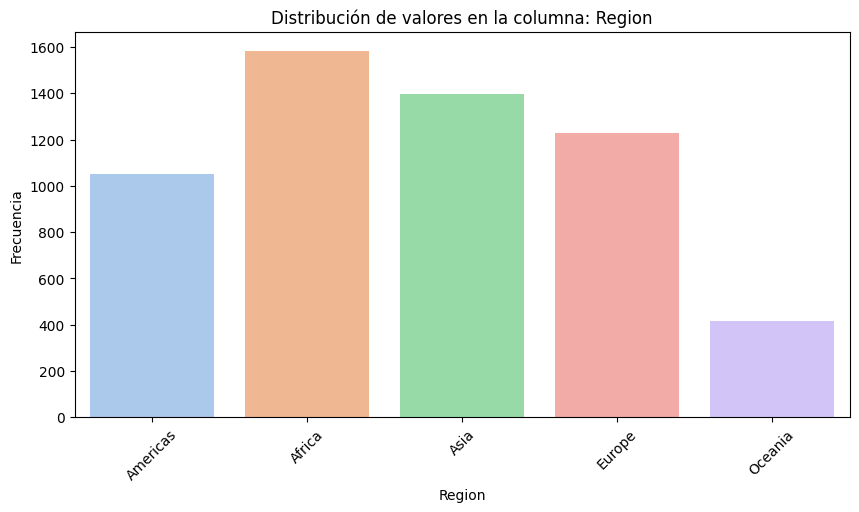

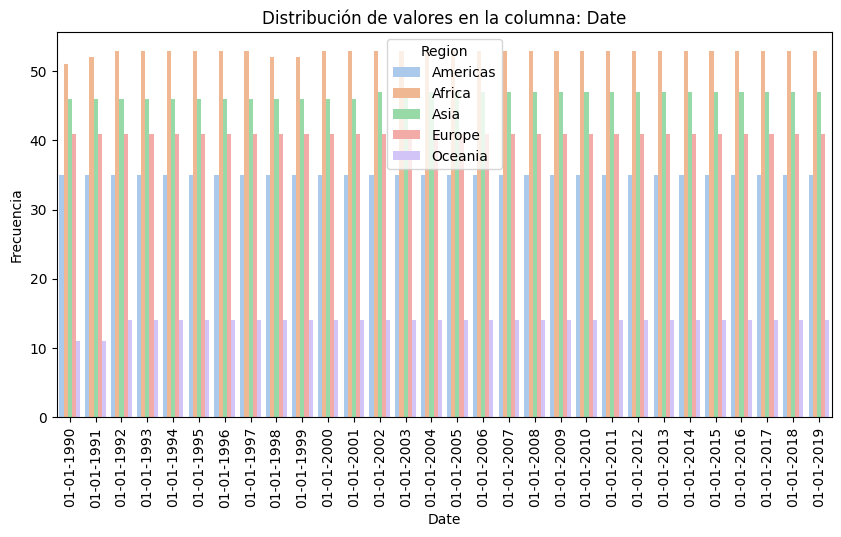

In [ ]:
for col in df_EmisionesCO2.select_dtypes(include=['object']).columns: 
    if col == 'Country':
        plt.figure(figsize=(40, 5))  
    else:
        plt.figure(figsize=(10, 5)) 
    if  col == 'Region':  
        plt.xticks(rotation=45)
    else:
         plt.xticks(rotation=90)
         
    sns.countplot(x=col, data=df_EmisionesCO2,hue='Region', palette='pastel')  
    plt.title(f'Distribución de valores en la columna: {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

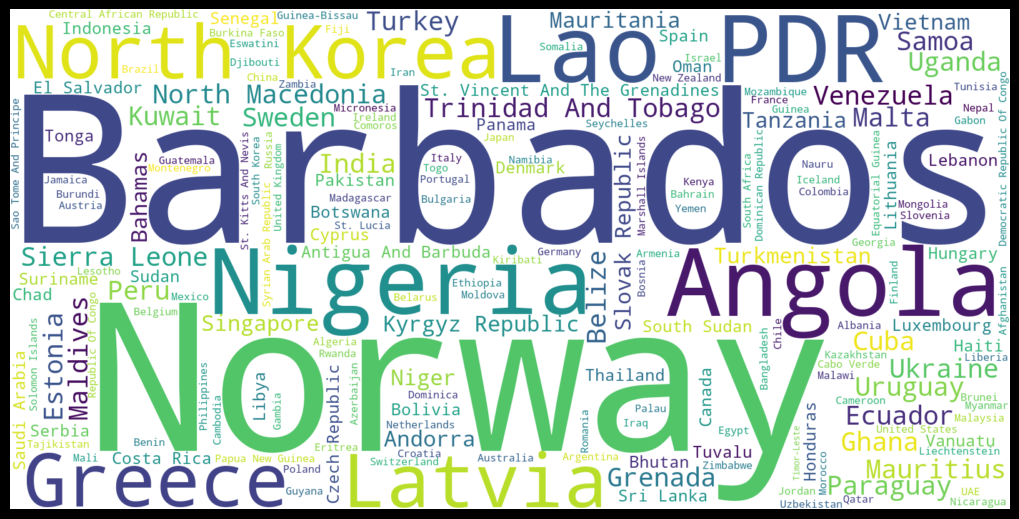

In [102]:
stop_words_list = set(STOPWORDS)

contador = Counter(df_EmisionesCO2["Country"].dropna().apply(lambda x: str(x)))

wcc = WordCloud(background_color="white", width=1600, height=800, max_words=1000, stopwords=stop_words_list, colormap='viridis')
wcc.generate_from_frequencies(contador)

plt.figure(figsize=(10, 5), facecolor='k')
plt.imshow(wcc, interpolation='bilinear')
plt.axis("off") 
plt.tight_layout(pad=0)
plt.show()

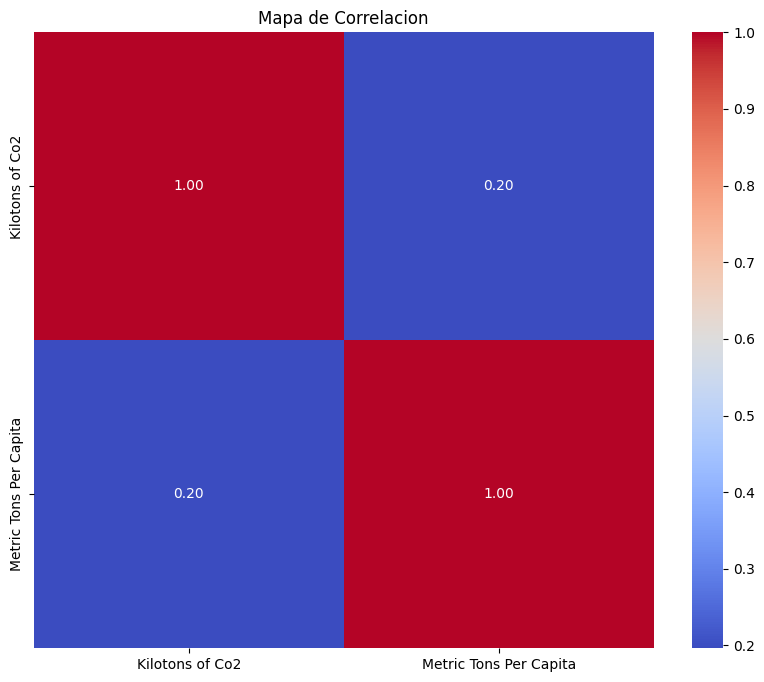

In [ ]:
df_numerics= df_EmisionesCO2.select_dtypes(include=[np.number])

plt.figure(figsize=(10, 8))
sns.heatmap(df_numerics.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Correlacion')
plt.show()

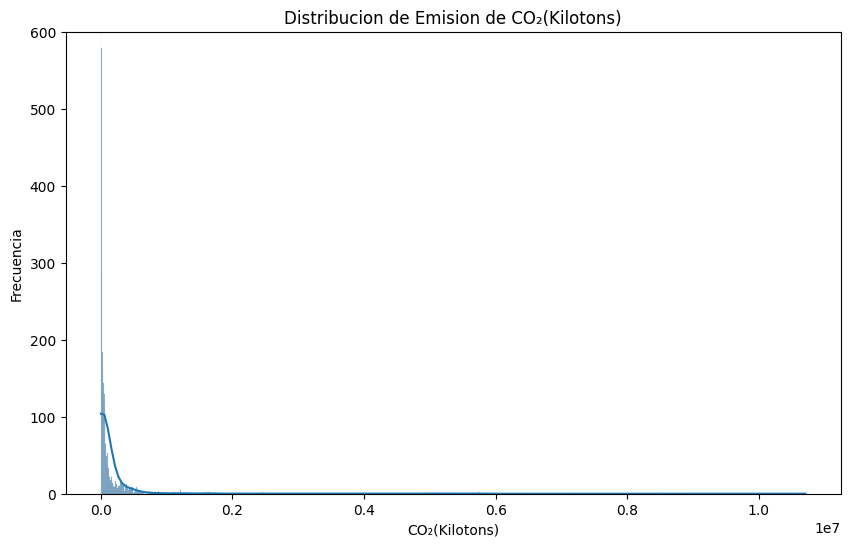

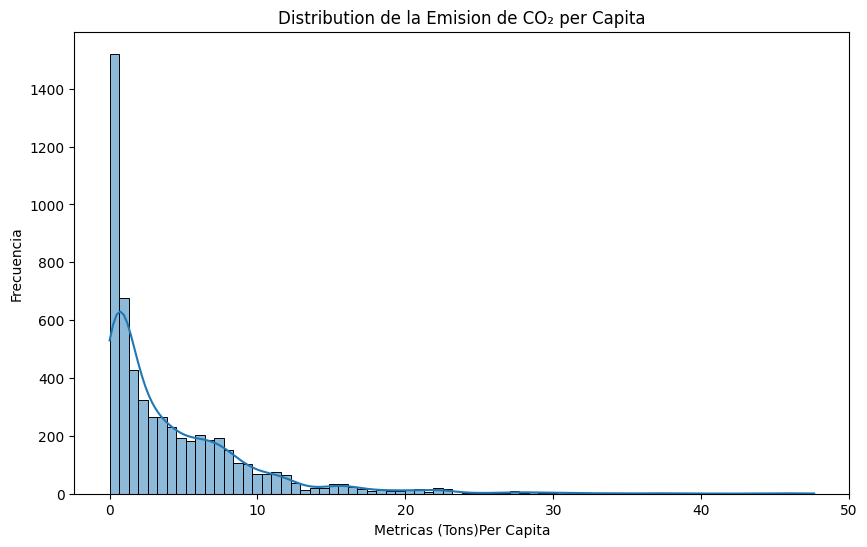

In [ ]:
plt.figure(figsize=(10, 6)) 

sns.histplot(df_EmisionesCO2['Kilotons of Co2'], kde=True, palette='mako')

plt.title('Distribucion de Emision de CO₂(Kilotons)')
plt.xlabel('CO₂(Kilotons)')
plt.ylabel('Frecuencia')
plt.ylim(0, 600)
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df_EmisionesCO2['Metric Tons Per Capita'], kde=True, palette='mako')
plt.title('Distribution de la Emision de CO₂ per Capita')
plt.xlabel('Metricas (Tons)Per Capita')
plt.ylabel('Frecuencia')
plt.show()

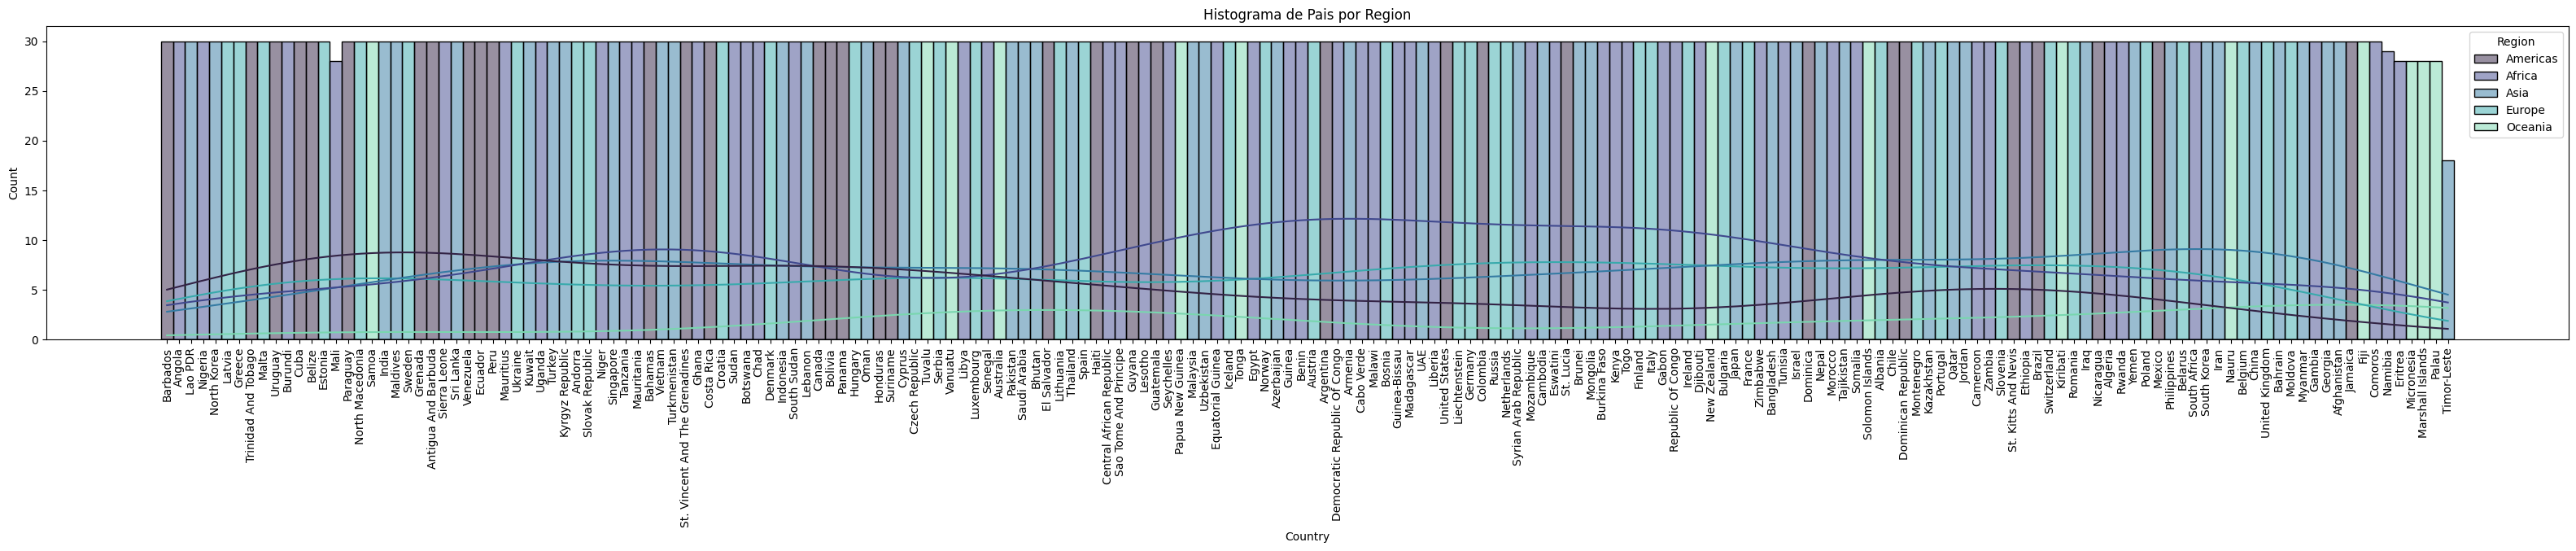

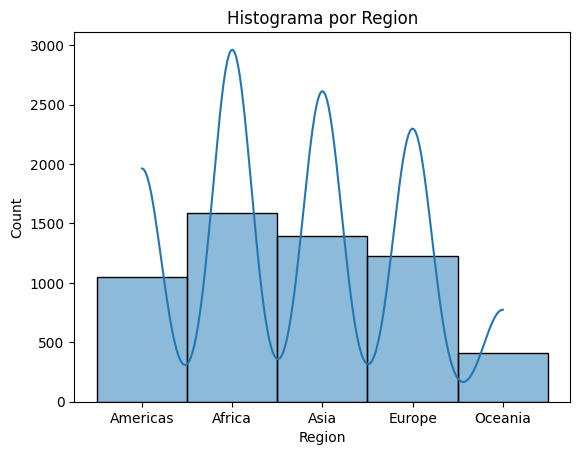

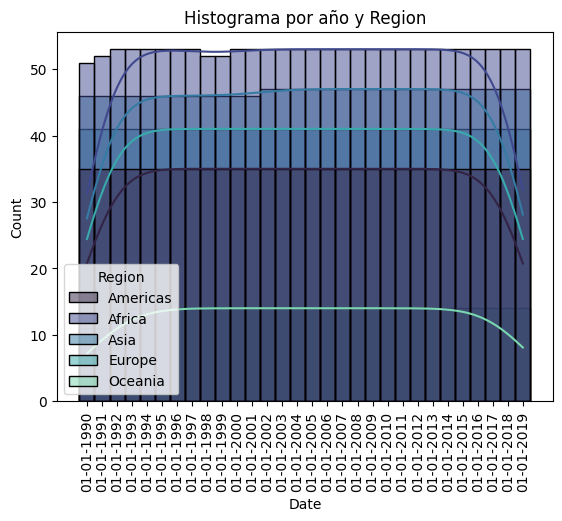

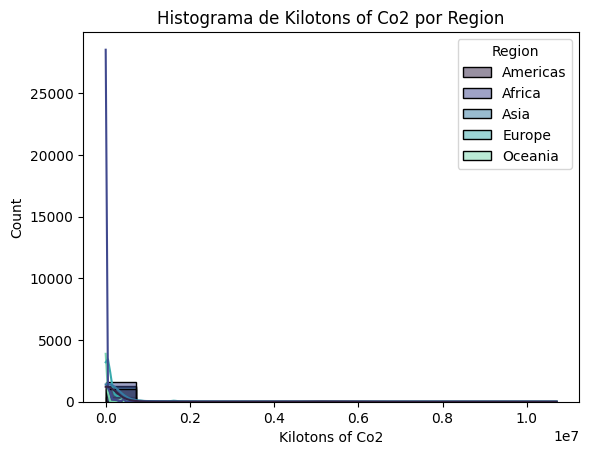

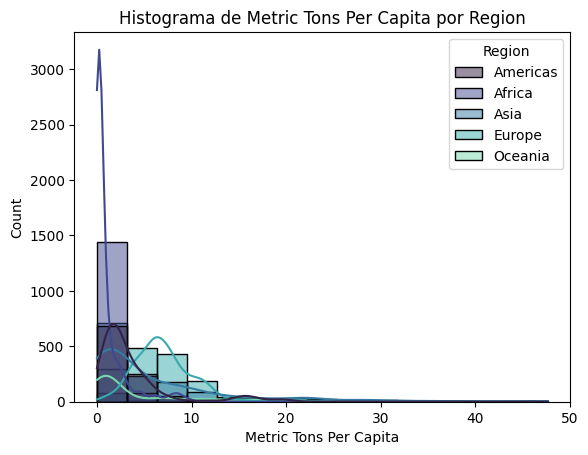

In [ ]:
for col in df_EmisionesCO2:
    if col == 'Country':
        plt.figure(figsize=(40, 5)) 
        sns.histplot(x=col, data=df_EmisionesCO2, hue='Region', kde=True, bins=15, palette='mako')
        plt.title(f"Histograma de Pais por Region")
        plt.xticks(rotation=90) 
    elif col == 'Region':
        sns.histplot(x=col, data=df_EmisionesCO2, kde=True, bins=15,)
        plt.title(f"Histograma por Region")
    elif col == 'Date':
        sns.histplot(x=col, data=df_EmisionesCO2, hue='Region', kde=True, bins=15, palette='mako')
        plt.title(f"Histograma por año y Region")
        plt.xticks(rotation=90) 
    else:  
        sns.histplot(x=col, data=df_EmisionesCO2, hue='Region', kde=True, bins=15, palette='mako')
        plt.title(f"Histograma de {col} por Region")    
    
    plt.show()

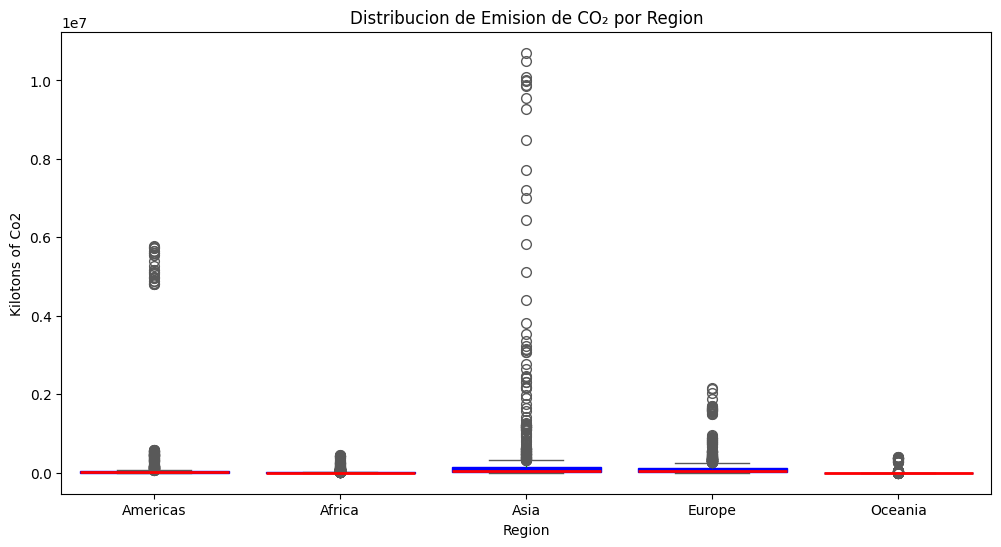

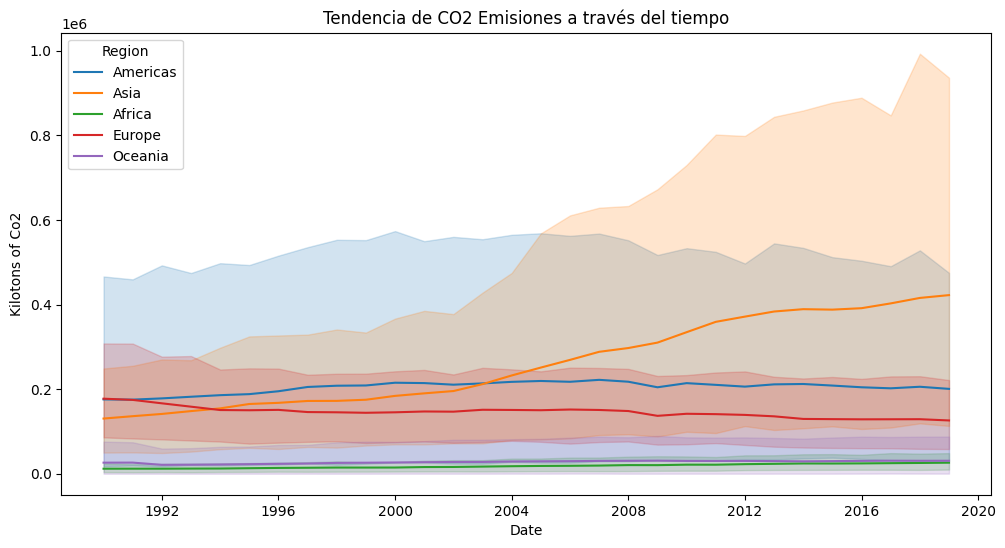

In [101]:
for column in columns:
    try:
        if df_EmisionesCO2[column].dtype == 'object' and column != 'Region':
            column_counts = df_EmisionesCO2.groupby(['Region', column]).size().reset_index(name='count')

            fig = px.bar(column_counts, x=column, y='count', color='Region', title=f'Distribucion de paises por Region',
                labels={column: column, 'count': 'Count'},text='count')
            fig.update_layout(xaxis_title=column, yaxis_title='Count', title_font=dict(size=18, family="Arial"), paper_bgcolor='rgba(255,255,255,0.8)', 
                plot_bgcolor='rgba(255,255,255,0.8)', xaxis={'categoryorder': 'total descending'})
            fig.update_traces(textposition='inside', texttemplate='%{text}', marker=dict(opacity=0.8))
            fig.show()
            
    except Exception as e:
        print(f"Could not create plot for column {column}: {e}")


plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='Kilotons of Co2', data=df_EmisionesCO2, palette="Set2",boxprops=dict(facecolor='lightblue', color='blue'), 
            whiskerprops=dict(color='green'), medianprops=dict(color='red', linewidth=2),flierprops=dict(marker='o', color='purple', markersize=7)
)
plt.title('Distribucion de Emision de CO₂ por Region')
plt.show()

fig = px.box(df_EmisionesCO2, x='Region', y='Metric Tons Per Capita', color='Region', title="Emision de CO₂ per Capita por Region")
fig.show()
df_EmisionesCO2['Date'] = pd.to_datetime(df_EmisionesCO2['Date'], errors='coerce') 
df_EmisionesCO2 = df_EmisionesCO2.sort_values(by='Date', ascending=True)

plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Kilotons of Co2', hue='Region', data=df_EmisionesCO2)
plt.title('Tendencia de CO2 Emisiones a través del tiempo')
plt.show()

df_EmisionesCO2 = df_EmisionesCO2.sort_values(by='Date')
fig = px.line(df_EmisionesCO2, x='Date', y='Kilotons of Co2', color='Country', title="Emisiones de CO₂ a través del tiempo")
fig.show()

In [ ]:
region_stats = df_EmisionesCO2.groupby('Region')[['Kilotons of Co2', 'Metric Tons Per Capita']].describe()
print(region_stats)

         Kilotons of Co2                                               \
                   count           mean           std    min      25%   
Region                                                                  
Africa            1585.0   18387.753950  5.642414e+04    0.0    550.0   
Americas          1050.0  204381.210200  8.806556e+05   60.0   1535.0   
Asia              1398.0  262610.714557  1.004450e+06   80.0   8020.0   
Europe            1230.0  145825.438943  2.939083e+05  140.0  11752.5   
Oceania            414.0   27821.352633  9.055315e+04   10.0     90.0   

                                         Metric Tons Per Capita            \
              50%       75%          max                  count      mean   
Region                                                                      
Africa     1990.0    6670.0    447929.99                 1585.0  1.052448   
Americas   7115.0   31590.0   5775810.00                 1050.0  3.646733   
Asia      36030.0  136245.0  1

Machine Learning

Mean Squared Error (MSE): 335457487883.14
R-squared (R2): 0.02


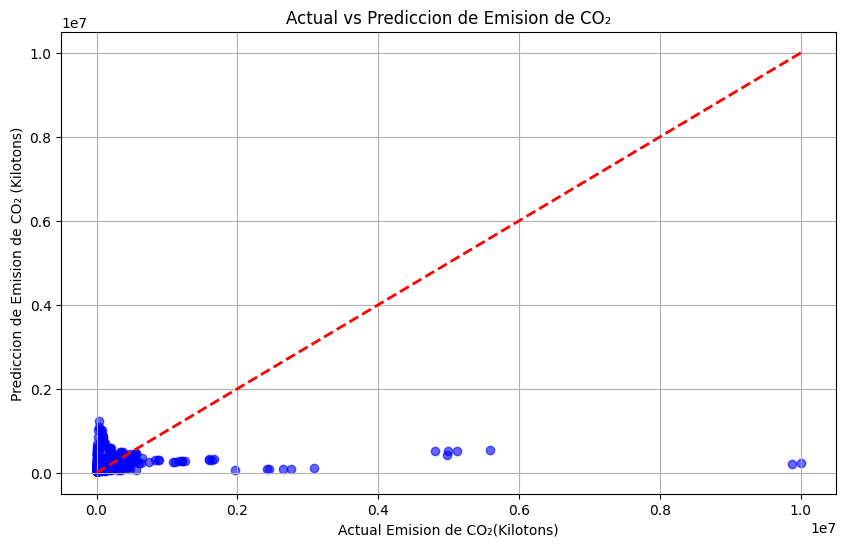

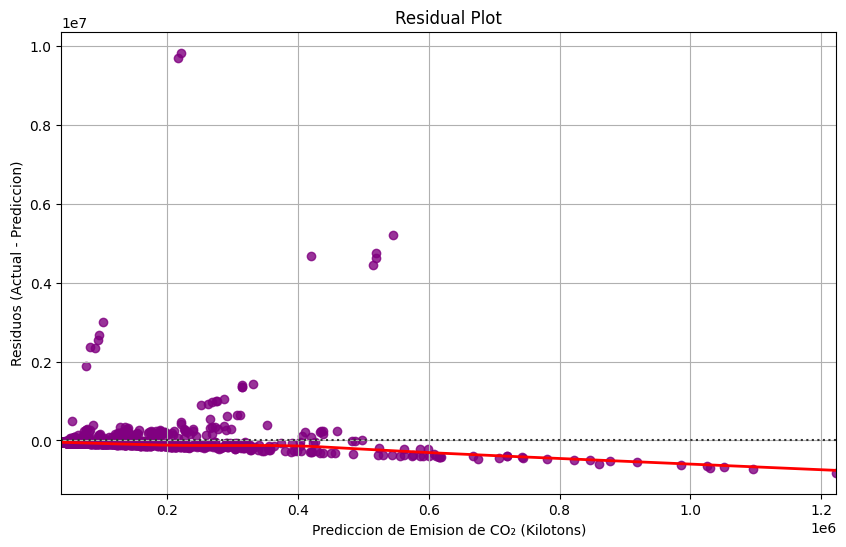

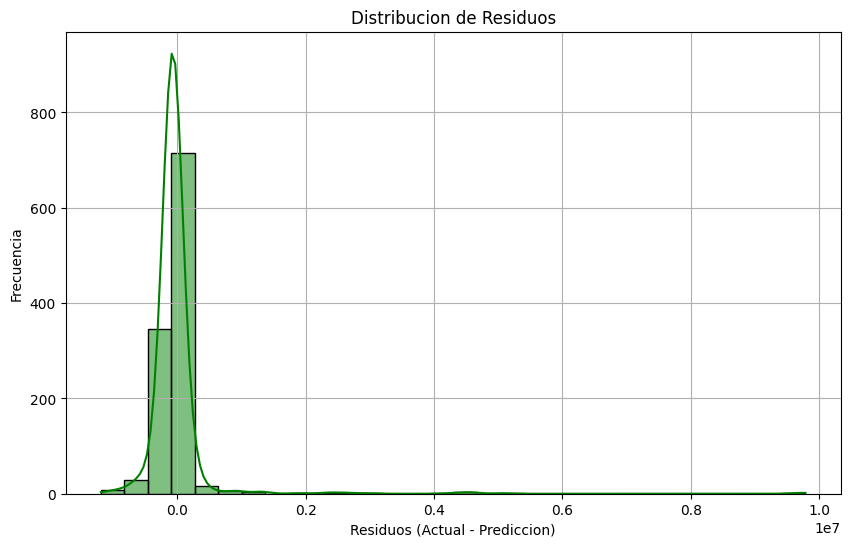

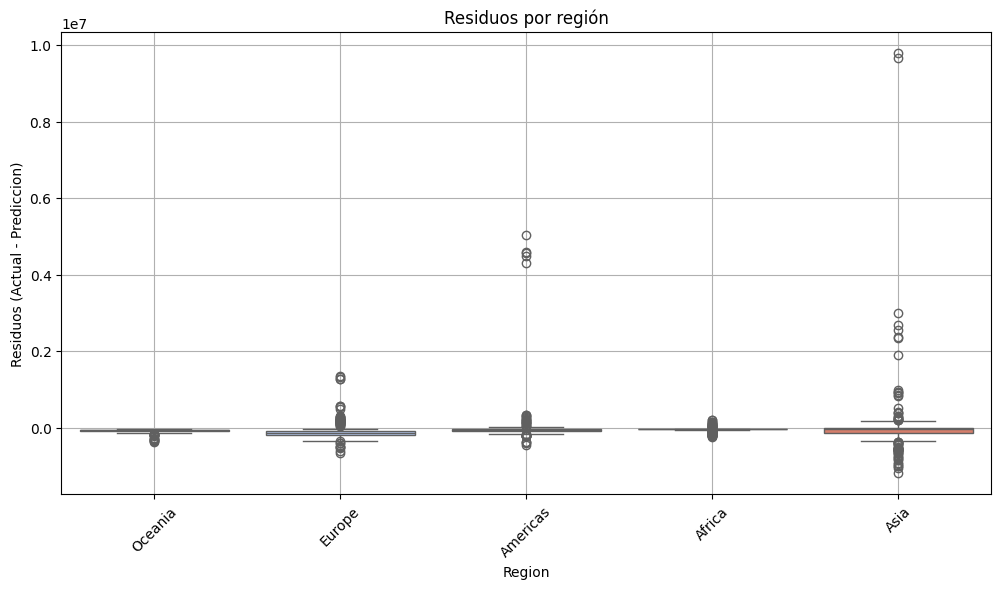

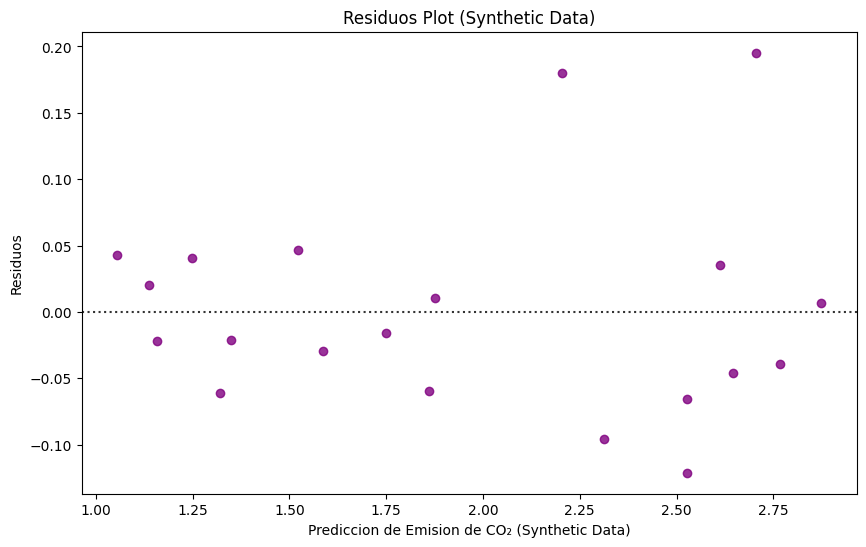

In [ ]:
X = df_EmisionesCO2[['Metric Tons Per Capita']]
y = df_EmisionesCO2['Kilotons of Co2'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, linestyle='--')
plt.title('Actual vs Prediccion de Emision de CO₂')
plt.xlabel('Actual Emision de CO₂(Kilotons)')
plt.ylabel('Prediccion de Emision de CO₂ (Kilotons)')
plt.grid(True)
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, color="purple", line_kws={'color': 'red', 'lw': 2})
plt.title('Residual Plot')
plt.xlabel('Prediccion de Emision de CO₂ (Kilotons)')
plt.ylabel('Residuos (Actual - Prediccion)')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='green', bins=30)
plt.title('Distribucion de Residuos')
plt.xlabel('Residuos (Actual - Prediccion)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

if 'Region' in df_EmisionesCO2.columns:
    df_residuos = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Residuals': residuals, 'Region': df_EmisionesCO2.loc[y_test.index, 'Region']})
    
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Region', y='Residuals', data=df_residuos, palette="coolwarm")
    plt.title('Residuos por región')
    plt.xlabel('Region')
    plt.ylabel('Residuos (Actual - Prediccion)')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

np.random.seed(42)
X_synthetic = np.random.rand(100, 1)
y_synthetic = 2 * X_synthetic + 1 + np.random.randn(100, 1) * 0.1 

X_train_synthetic, X_test_synthetic, y_train_synthetic, y_test_synthetic = train_test_split(X_synthetic, y_synthetic, test_size=0.2, random_state=42)

model_synthetic = LinearRegression()
model_synthetic.fit(X_train_synthetic, y_train_synthetic)

y_pred_synthetic = model_synthetic.predict(X_test_synthetic)
residuals_synthetic = y_test_synthetic - y_pred_synthetic

plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred_synthetic.flatten(), y=residuals_synthetic.flatten(), lowess=False, color="purple", line_kws={'color': 'red', 'lw': 2})
plt.title('Residuos Plot (Synthetic Data)')
plt.xlabel('Prediccion de Emision de CO₂ (Synthetic Data)')
plt.ylabel('Residuos')
plt.show()